# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


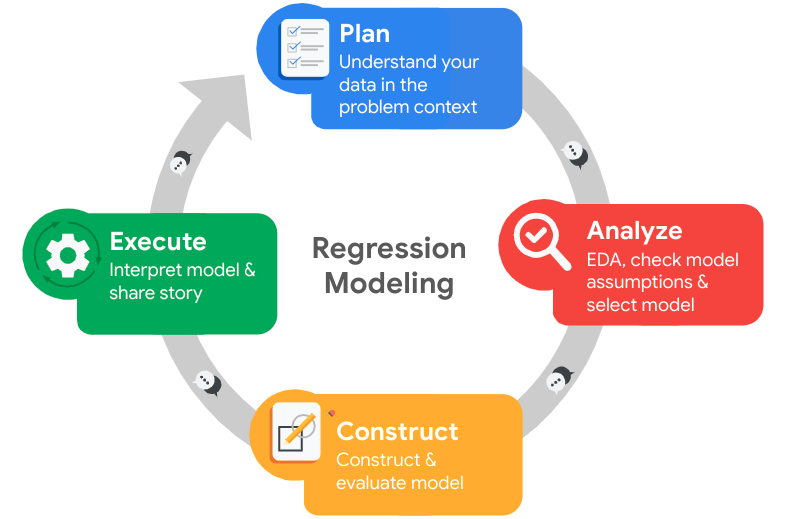

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don‚Äôt know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what‚Äôs likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

üí≠
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




The stakeholders are the HR deprtment of the company who want to look at the people who are more likely to leave the company and chceck for methods to improve the satisfaction levels of the employee

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [19]:
# Import packages
#General Packages
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
#Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,\
roc_auc_score, roc_curve
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split

from xgboost import XGBClassifier
from xgboost import plot_importance

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Saving Model
import pickle
### YOUR CODE HERE ### 
import warnings
warnings.filterwarnings('ignore')

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [20]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
data = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [21]:
# Gather basic information about the data
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [22]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
data.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [23]:
# Display all column names
### YOUR CODE HERE ###
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [24]:
# Rename columns as needed
### YOUR CODE HERE ###
data = data.rename(columns={"Work_accident": "work_accident",
                            "Department":"department", 
                            "time_spend_company":"tenure", 
                            "average_montly_hours":"average_monthly_hours"})

# Display all column names after the update
### YOUR CODE HERE ###
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [25]:
# Check for missing values
### YOUR CODE HERE ###
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [26]:
# Check for duplicates
### YOUR CODE HERE ###
data.duplicated().sum()

3008

In [27]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
data[data.duplicated()].head()

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

In [28]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
data_no_dupe =  data.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
data_no_dupe.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

### Check outliers

Check for outliers in the data.

<Axes: ylabel='tenure'>

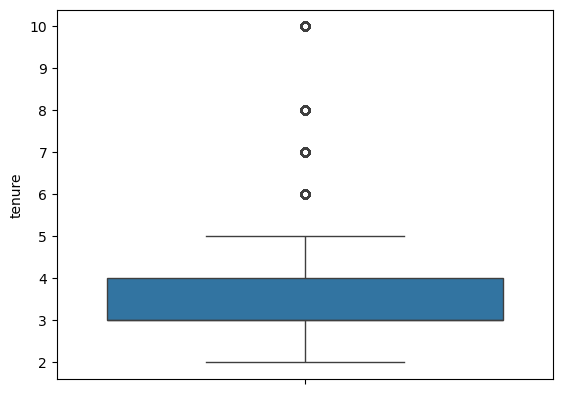

In [30]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(data["tenure"])


In [31]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
percent_25 = data["tenure"].quantile(0.25)
percent_75 =  data["tenure"].quantile(0.75)

iqr  = percent_75 - percent_25

upper_limit =  percent_75 +  1.5*iqr
lower_limit =  percent_25 -  1.5*iqr


num_outliers = data_no_dupe[(data_no_dupe["tenure"]>upper_limit)| (data_no_dupe["tenure"]<lower_limit)]

print(len(num_outliers))

824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



üí≠
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [32]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(data_no_dupe['left'].value_counts())
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(data_no_dupe['left'].value_counts(normalize=True)*100)

left
0    10000
1     1991
Name: count, dtype: int64
left
0    83.39588
1    16.60412
Name: proportion, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [34]:
data_no_dupe.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

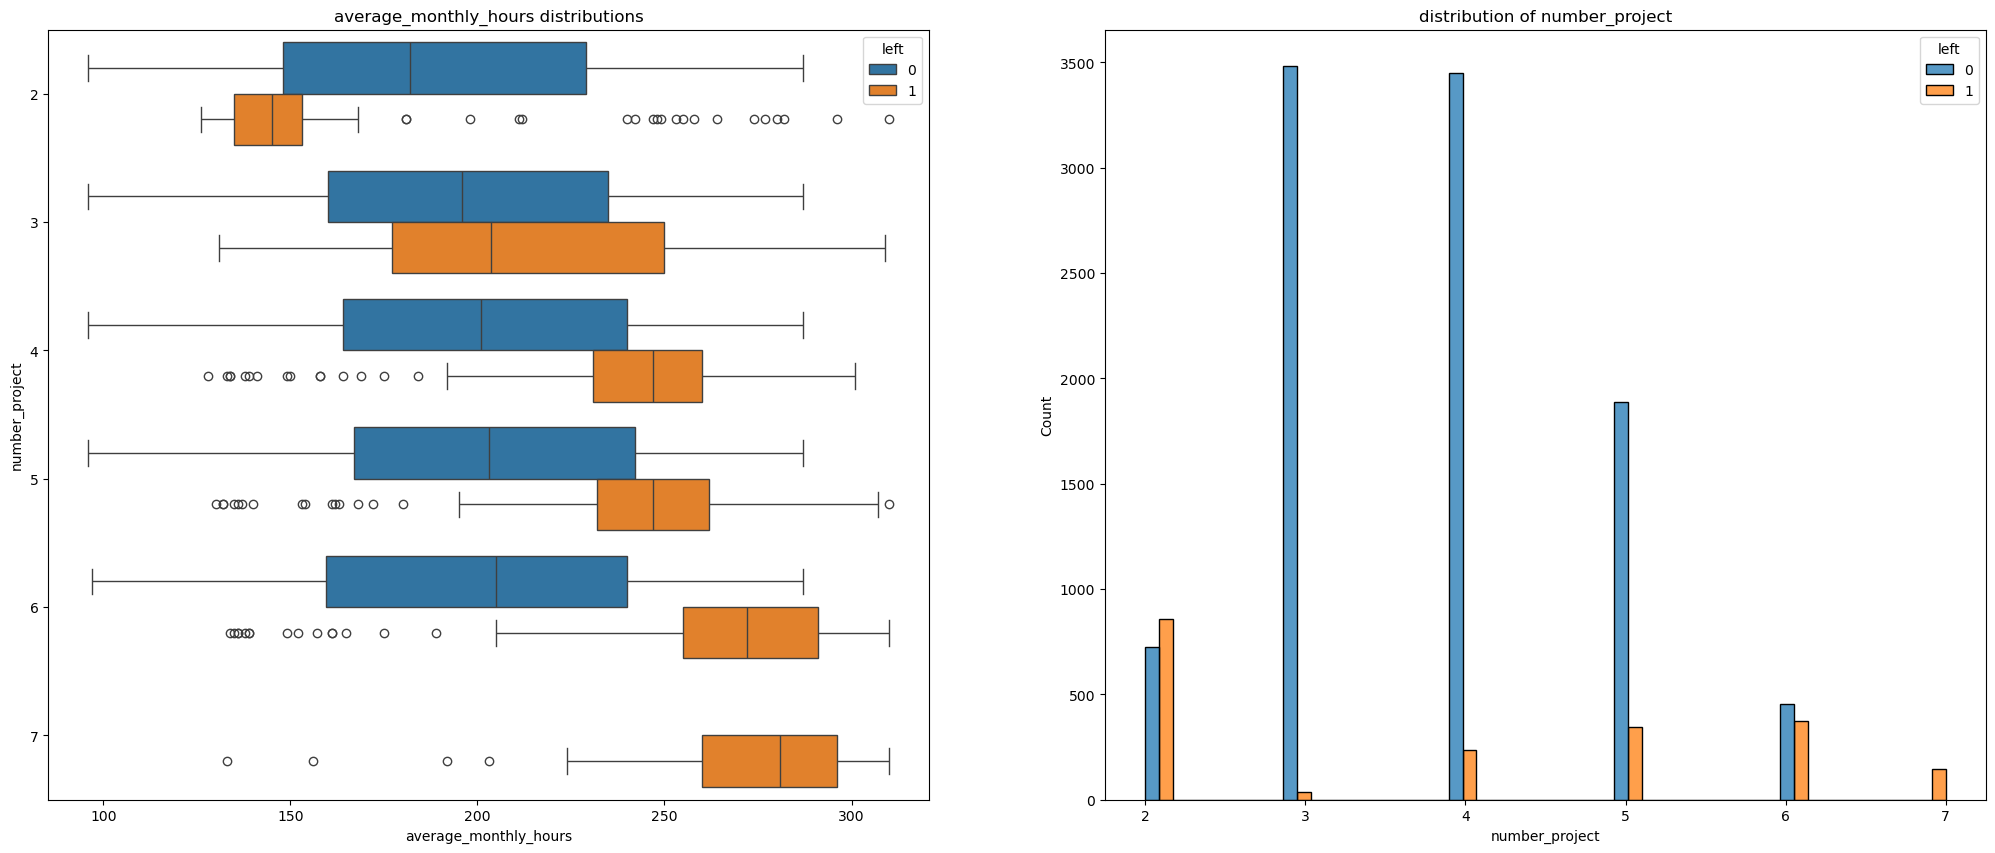

In [49]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig,ax =  plt.subplots(1,2,figsize =(25,10))
# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data= data_no_dupe, x ='average_monthly_hours',y ='number_project' , hue = 'left',ax = ax[0],orient = 'h')
ax[0].set_title("average_monthly_hours distributions")
# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
sns.histplot(data=data_no_dupe, x = 'number_project', hue = 'left',multiple='dodge',ax = ax[1])
ax[1].set_title("distribution of number_project")

# Display the plots
plt.show()

Next we can check the no of years that the employee stayed in the company and the correlation to those who left

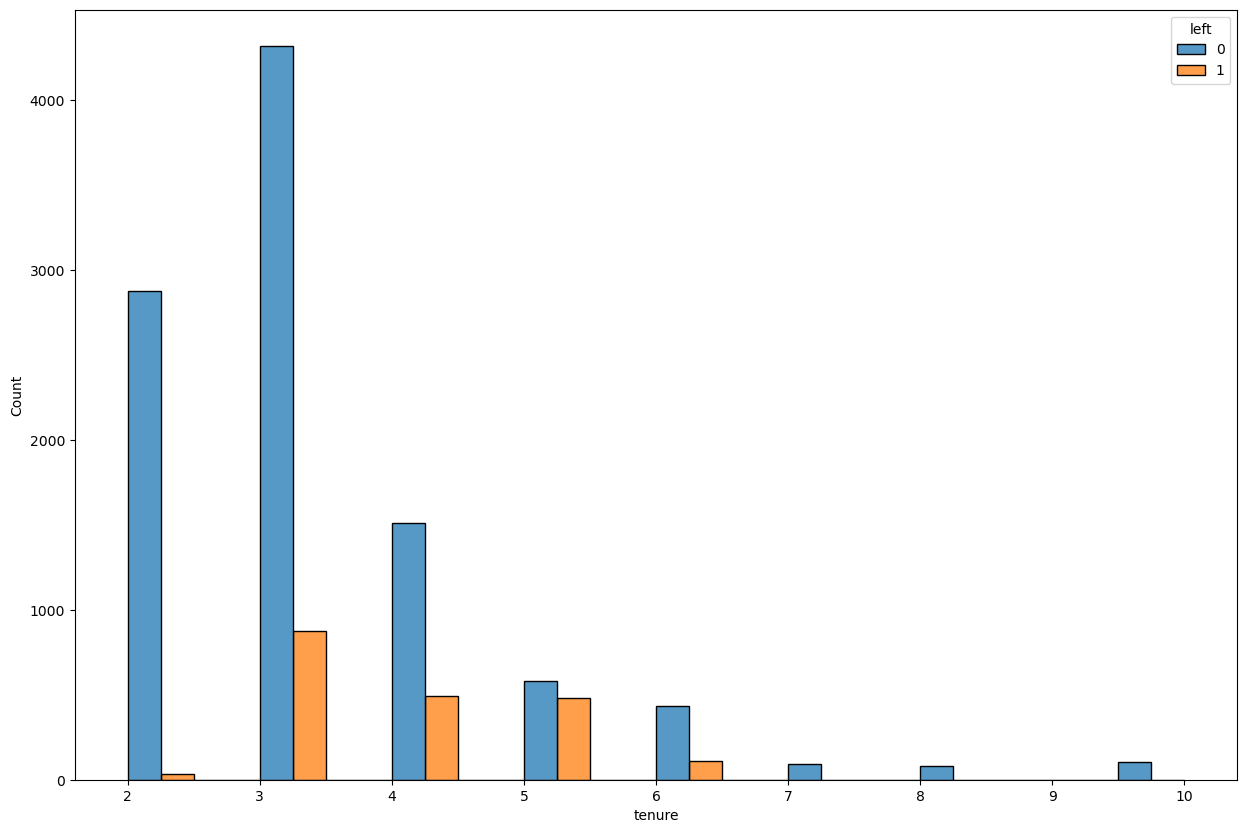

In [58]:
# Create a plot as needed
### YOUR CODE HERE ###
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(15,10))
sns.histplot(data=data_no_dupe, x = 'tenure', hue = 'left',multiple='dodge',binwidth=0.5)
plt.show()

This shows that the employees tend to leave the company during the period of 3-6 years when compared to other employees who have worked more or less years at the company

We can also check if there is any skewed data where the employee is more prone to leave the company for any particular department

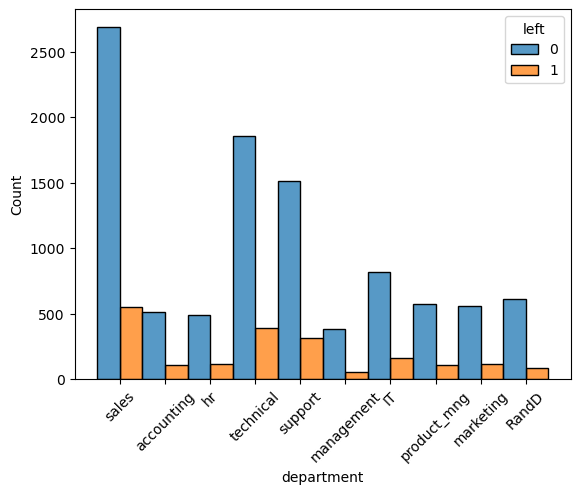

In [61]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data =  data_no_dupe, x =  "department", hue = "left", multiple='dodge')
plt.xticks(rotation = 45)
plt.show()

<Axes: xlabel='satisfaction_level', ylabel='Count'>

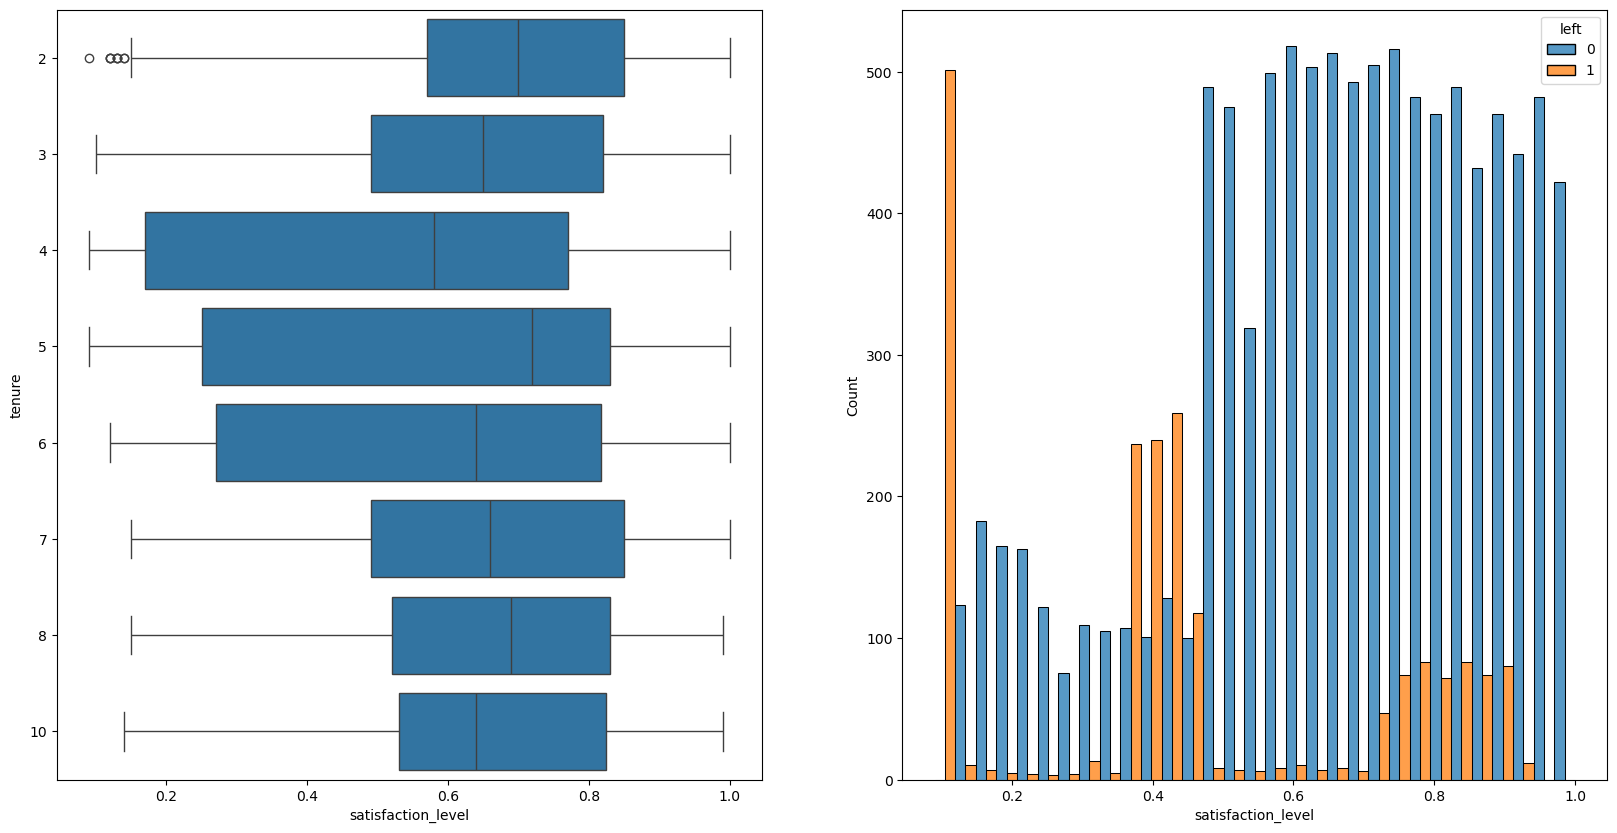

In [68]:
# Create a plot as needed
### YOUR CODE HERE ##
fig,ax =  plt.subplots(1,2, figsize = (20,10))

sns.boxplot(data = data_no_dupe, x = "satisfaction_level" , y = "tenure", orient='h', ax = ax[0])


sns.histplot(data =  data_no_dupe , x = "satisfaction_level", hue = 'left', multiple='dodge', ax = ax[1])

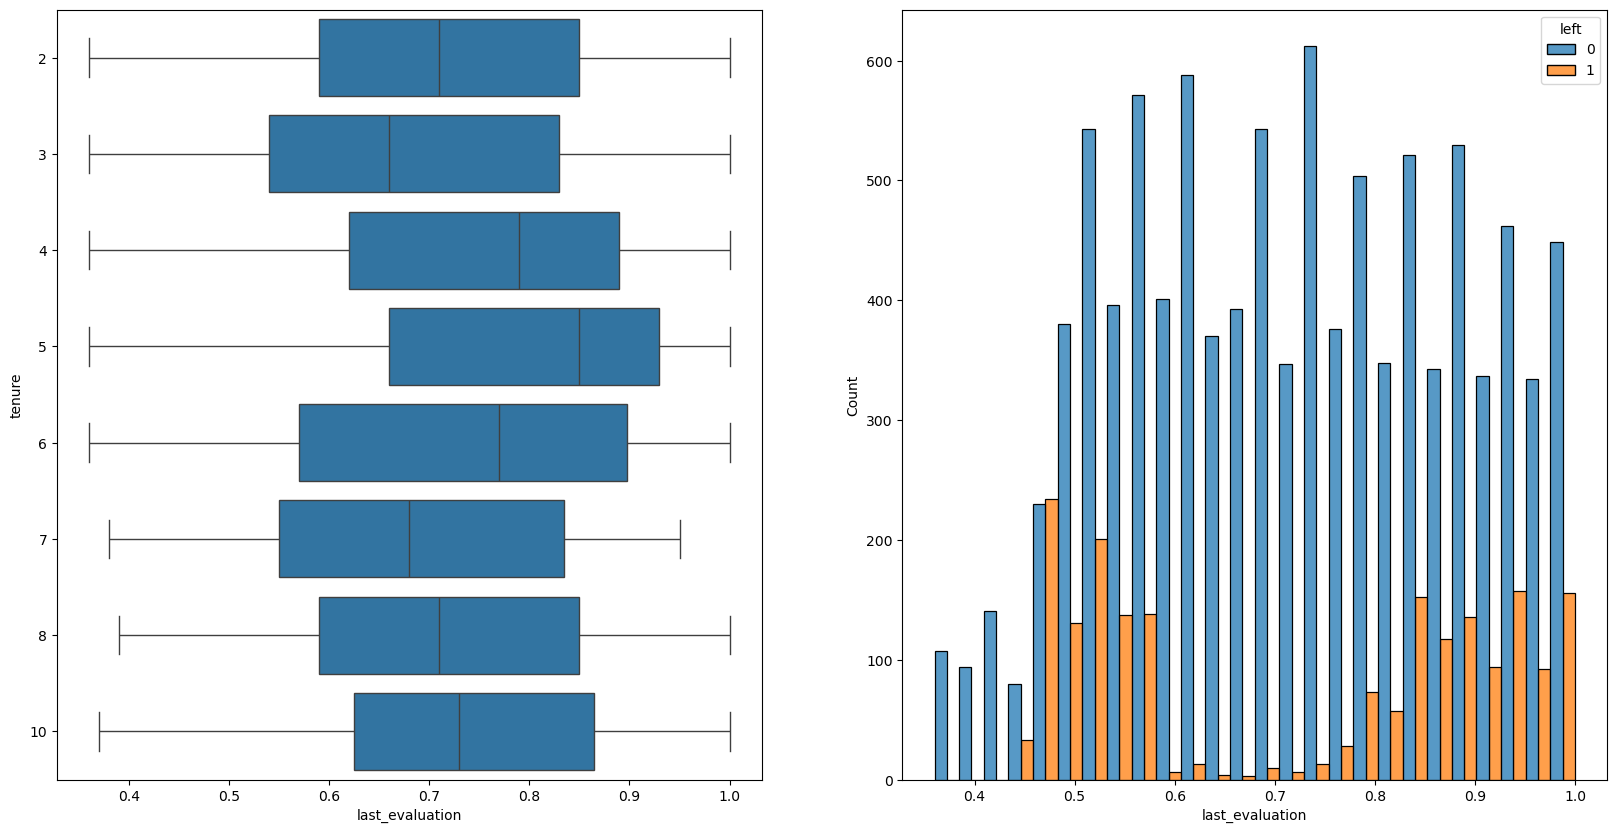

In [71]:
# Create a plot as needed
### YOUR CODE HERE ##
fig,ax =  plt.subplots(1,2, figsize = (20,10))

sns.boxplot(data = data_no_dupe, x = "last_evaluation" , y = "tenure", orient='h', ax = ax[0])


sns.histplot(data =  data_no_dupe , x = "last_evaluation", hue = 'left', multiple='dodge', ax = ax[1])
plt.show()

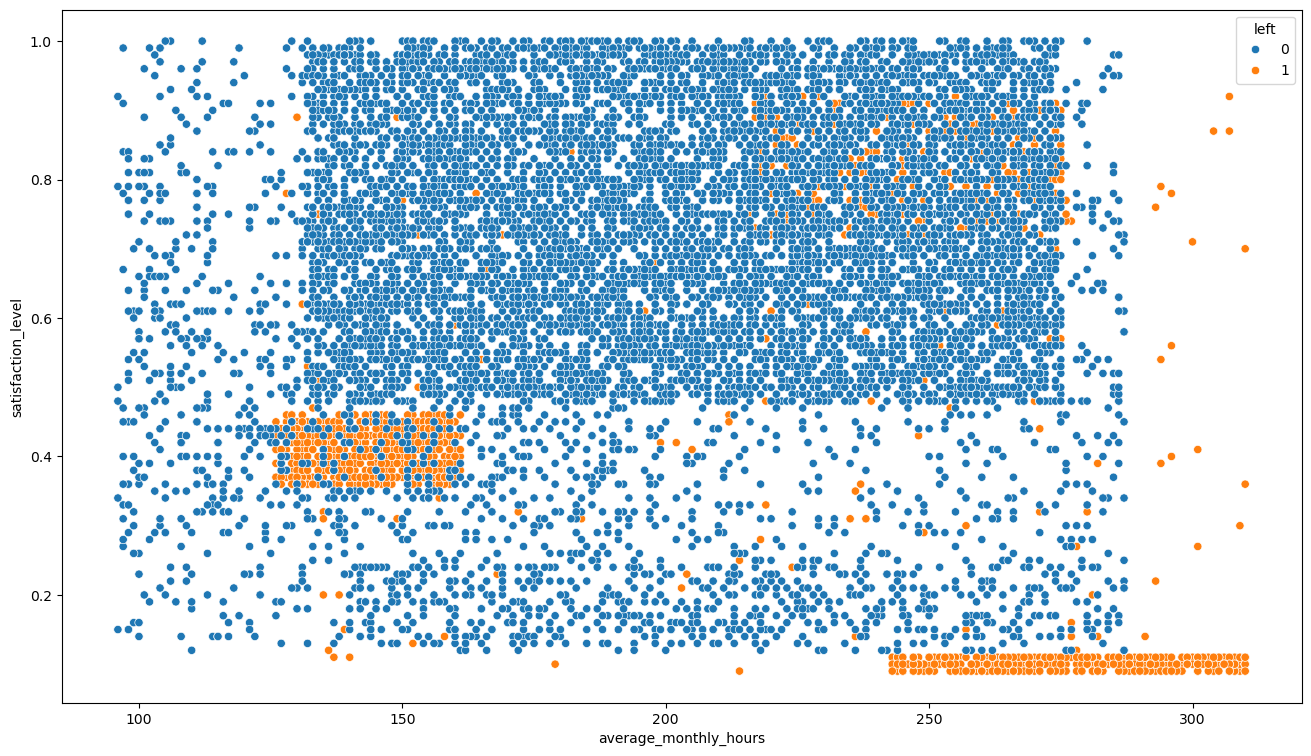

In [72]:
plt.figure(figsize=(16, 9))
sns.scatterplot(x = data_no_dupe["average_monthly_hours"], y = data_no_dupe["satisfaction_level"], hue =  data_no_dupe["left"])
plt.show()

In [81]:
data_corr = data.drop(columns=["department","salary"], axis = 0)

We will look at the heatmap to understand any correlation between the variables

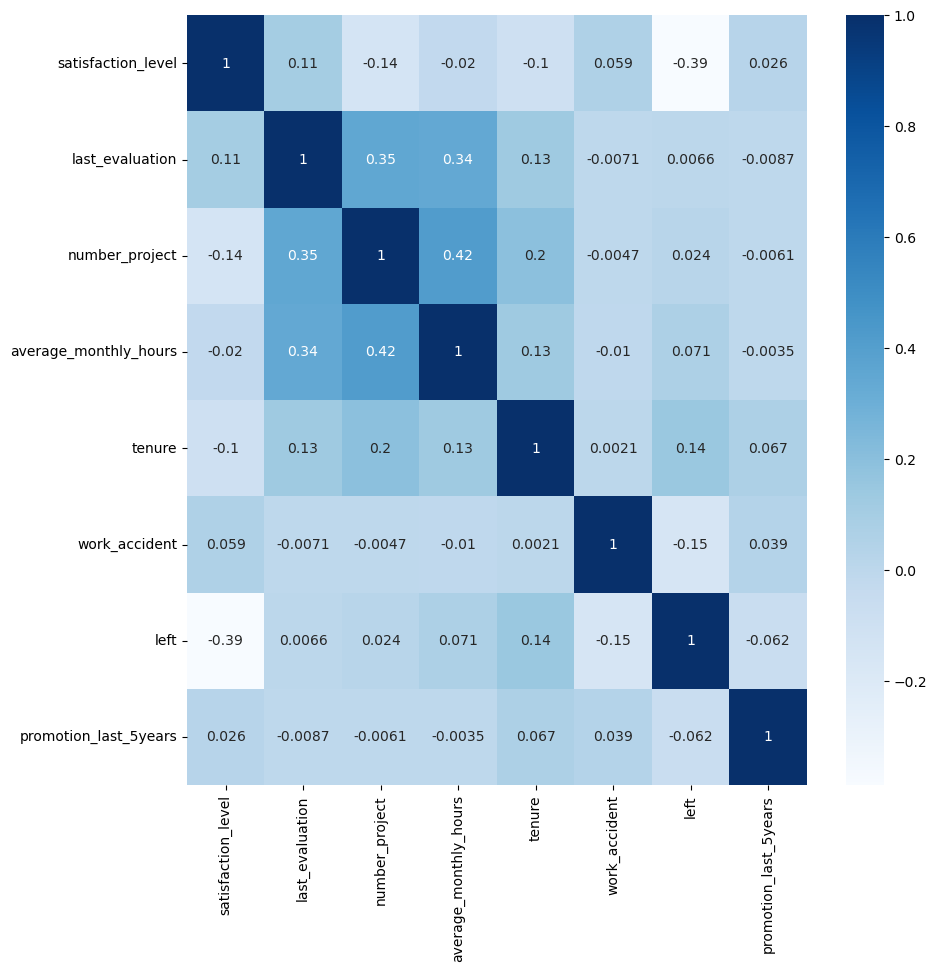

In [90]:
plt.figure(figsize=(10,10))
sns.heatmap(data_corr.corr(),  annot=True ,cmap = 'Blues')
plt.show()

### Insights

From the plots we can understand few patterns about the employees that leave the company

Employees who leave the company are either working very less hours in comparison or working a lot of hours when comapred to others. Another marker that can be used is that employees who worked in more number of projects also tend to leave the company when compared to those who work on lesser number of projects.

Another aspect that has been noted  is that employees tend to leave the company when they arrive about a duration of about 3-4 years in the company. this may be due to better appraisals being obtained from competing companies or other offers they are able to obtain. Employees who have stayed for more than 6 ears tend to stay with the company.


The attrition tends to be equally distributed accross all departments and therefore we can conclude that all deparments function similarly to each other in this regard.

Unsurprisingly employees with lower satisfaction levels are more prone to leave the company and this peaks at satisfaction leve of zero and at satisfaction levels ~ 0.4- 0.6. The satisfaction level for 0.4-0.6 employees who leave the company is an anomaly when compared to the other satisfaction levels

While considering the satisfaction levels to the average working hours in a month, we can see from the scatterplot that the employees who work an average of  250-300 hrs tend to less satisfied and all of them leave the company. There is also an anomaly in the data where the employees who have satisfaction levels of 0.4-0.6 and working about 150 hrs a month tend to leave the company.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


üîé
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size






### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The prediction task is to identify if an employee will leave the company or stay with the companny

### Identify the types of models most appropriate for this task.

We can use classifiation models which will predict if an employee will stay or leave. We can use random forest classifier or an XGBoost Classifier and determine the champion model to predict the test data.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [98]:
data_encoded["salary"].value_counts()

salary
0    5740
1    5261
2     990
Name: count, dtype: int64

In [94]:
data_encoded =  data_no_dupe.copy()
data_encoded["salary"] =  data_encoded["salary"].astype("category").cat.set_categories(['low','medium','high']).cat.codes

In [96]:
data_encoded =  pd.get_dummies(data_encoded,drop_first=True)

In [97]:
data_encoded.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  \
0       3              0     1                      0       0   
1       6              0     1                      0       1   
2       4              0     1                      0       1   
3       5              0     1                      0       0   
4       3              0     1                      0       0   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [99]:
y =  data_encoded["left"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [100]:
X =  data_encoded.drop(columns=["left"],axis=1)
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  department_RandD  \
0       3              0                      0       0             False   
1       6              0                      0       1             False   
2       4              0                      0       1             False   
3       5              0                      0       0             False   
4       3              0                      0       0             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
1                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
1                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   

   department_support  department_technical  
0               False                 False  
1               False                 False  
2               False                 False  
3               False                 False  
4               False                 False

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [112]:
tree = DecisionTreeClassifier(random_state=0)

cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

scoring =  ['accuracy','precision','recall','f1']

tree_cv =  GridSearchCV(tree,cv_params, scoring=scoring,cv =5, refit='f1')

In [113]:
%%time
tree_cv.fit(X_train,y_train)

CPU times: total: 2.39 s
Wall time: 3.55 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [114]:
# Check best parameters
tree_cv.best_params_

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 6}

In [115]:
tree_cv.best_score_

0.9435127115551267

In [145]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'accuracy': [accuracy],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1]
                        })
  
    return table

In [146]:
# Get all CV scores
tree_cv_results =  make_results("decision tree",tree_cv,'f1')
tree_cv_results

model  accuracy  precision    recall        f1
0  decision tree  0.981547   0.972773  0.916458  0.943513

Random Forest

In [122]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate GridSearch
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')

In [123]:
%%time
rf_cv.fit(X_train,y_train)
 # --> Wall time: ~10min

CPU times: total: 17min 14s
Wall time: 23min 16s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [124]:
rf_cv.best_score_

0.949367478562101

In [125]:
rf_cv.best_estimator_

RandomForestClassifier(max_features=1.0, max_samples=0.7, min_samples_split=4,
                       n_estimators=500, random_state=0)

In [147]:
# Get all CV scores
rf_cv_results = make_results('random forest cv', rf_cv, 'f1')
print(tree_cv_results)
print(rf_cv_results)

           model  accuracy  precision    recall        f1
0  decision tree  0.981547   0.972773  0.916458  0.943513
              model  accuracy  precision    recall        f1
0  random forest cv  0.983632   0.989248  0.912743  0.949367


In [148]:
combined_table =  pd.concat([tree_cv_results,rf_cv_results],axis=0)
combined_table

model  accuracy  precision    recall        f1
0     decision tree  0.981547   0.972773  0.916458  0.943513
0  random forest cv  0.983632   0.989248  0.912743  0.949367

In [149]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'accuracy': [accuracy],
                          'f1': [f1]
                         })
  
    return table

In [150]:
rf_test_scores = get_scores('random forest1 test', rf_cv, X_test, y_test)
rf_test_scores

model  precision    recall  accuracy        f1
0  random forest1 test   0.983146  0.933333  0.987078  0.957592

In [151]:
combined_table = pd.concat([combined_table,rf_test_scores],axis=0)

In [152]:
combined_table

model  accuracy  precision    recall        f1
0        decision tree  0.981547   0.972773  0.916458  0.943513
0     random forest cv  0.983632   0.989248  0.912743  0.949367
0  random forest1 test  0.987078   0.983146  0.933333  0.957592

Feature Engineering

You might be skeptical of the high evaluation scores. There is a chance that there is some data leakage occurring. Data leakage is when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the `average_monthly_hours` column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours. 

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models. 

You could proceed by dropping `satisfaction_level` and creating a new feature that roughly captures whether an employee is overworked. You could call this new feature `overworked`. It will be a binary variable.

In [160]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
data_drop = data_encoded.drop(columns=["satisfaction_level"],axis=1)

# Display first few rows of new dataframe
data_drop.head()

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
1             0.86               5                    262       6   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   

   work_accident  left  promotion_last_5years  salary  department_RandD  \
0              0     1                      0       0             False   
1              0     1                      0       1             False   
2              0     1                      0       1             False   
3              0     1                      0       0             False   
4              0     1                      0       0             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
1                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
1                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   

   department_support  department_technical  
0               False                 False  
1               False                 False  
2               False                 False  
3               False                 False  
4               False                 False

In [161]:
# Create `overworked` column. For now, it's identical to average monthly hours.
data_drop["overworked"] =  data_drop["average_monthly_hours"]

# Inspect max and min average monthly hours values
print("Max hours = ", data_drop["average_monthly_hours"].max() )
print("Min hours = ", data_drop["average_monthly_hours"].min())

Max hours =  310
Min hours =  96


166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day. 

You could define being overworked as working more than 175 hours per month on average.

To make the `overworked` column binary, you could reassign the column using a boolean mask.
- `df3['overworked'] > 175` creates a series of booleans, consisting of `True` for every value > 175 and `False` for every values ‚â§ 175
- `.astype(int)` converts all `True` to `1` and all `False` to `0` 

In [162]:
# Define `overworked` as working > 175 hrs/week
data_drop["overworked"] = (data_drop["overworked"]>175).astype(int)

# Display first few rows of new column
data_drop["overworked"].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int32

In [163]:
# Drop the `average_monthly_hours` column
data_drop = data_drop.drop(columns=["average_monthly_hours"],axis=1)

# Display first few rows of resulting dataframe
data_drop.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_RandD  department_accounting  \
0                      0       0             False                  False   
1                      0       1             False                  False   
2                      0       1             False                  False   
3                      0       0             False                  False   
4                      0       0             False                  False   

   department_hr  department_management  department_marketing  \
0          False                  False                 False   
1          False                  False                 False   
2          False                  False                 False   
3          False                  False                 False   
4          False                  False                 False   

   department_product_mng  department_sales  department_support  \
0                   False              True               False   
1                   False              True               False   
2                   False              True               False   
3                   False              True               False   
4                   False              True               False   

   department_technical  overworked  
0                 False           0  
1                 False           1  
2                 False           1  
3                 False           1  
4                 False           0

In [164]:
# Isolate the outcome variable
y = data_drop["left"]

# Select the features
X =  data_drop.drop(columns=["left"],axis=1)

In [165]:
# Create test data
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,stratify=y, random_state=0)

In [167]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate GridSearch
tree_new_cv = GridSearchCV(tree, cv_params, scoring=scoring, cv=5, refit='f1')

In [168]:
%%time
tree_new_cv.fit(X_train,y_train)

CPU times: total: 2.59 s
Wall time: 2.8 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [169]:
# Check best params
tree_new_cv.best_params_

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 6}

In [170]:
# Check best AUC score on CV
tree_new_cv.best_score_

0.8923575839773992

In [171]:
# Get all CV scores
tree_new_cv_results = make_results('decision tree2 cv', tree_new_cv, 'f1')
print(tree_cv_results)
print(tree_new_cv_results)

           model  accuracy  precision    recall        f1
0  decision tree  0.981547   0.972773  0.916458  0.943513
               model  accuracy  precision    recall        f1
0  decision tree2 cv  0.963824   0.882397  0.902701  0.892358


#### Random forest - Round 2

In [172]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500]
             }  

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate GridSearch
rf_new = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')

In [173]:
%%time
rf_new.fit(X_train, y_train) # --> Wall time: 7min 5s

CPU times: total: 11min 57s
Wall time: 12min 20s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [174]:
# Check best params
rf_new.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [175]:
# Check best AUC score on CV
rf_new.best_score_

0.901741460482907

In [176]:
rf_new_cv_results = make_results('random forest2 cv', rf_new, 'f1')
print(tree_new_cv_results)
print(rf_new_cv_results)

               model  accuracy  precision    recall        f1
0  decision tree2 cv  0.963824   0.882397  0.902701  0.892358
               model  accuracy  precision    recall        f1
0  random forest2 cv  0.967786   0.913834  0.890141  0.901741


Again, the scores dropped slightly, but the random forest performs better than the decision tree if using AUC as the deciding metric. 

Score the champion model on the test set now.

In [177]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf_new, X_test, y_test)
rf2_test_scores

model  precision    recall  accuracy        f1
0  random forest2 test   0.896203  0.889447  0.964569  0.892812

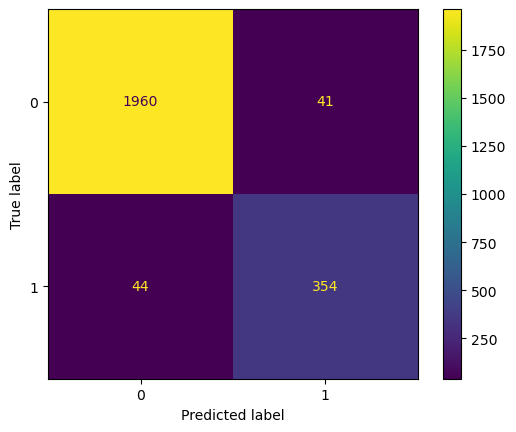

In [178]:
# Generate array of values for confusion matrix
preds = rf_new.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf_new.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_new.classes_)
disp.plot(values_format='');

The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.

For exploratory purpose, you might want to inspect the splits of the decision tree model and the most important features in the random forest model. 

#### Decision tree splits

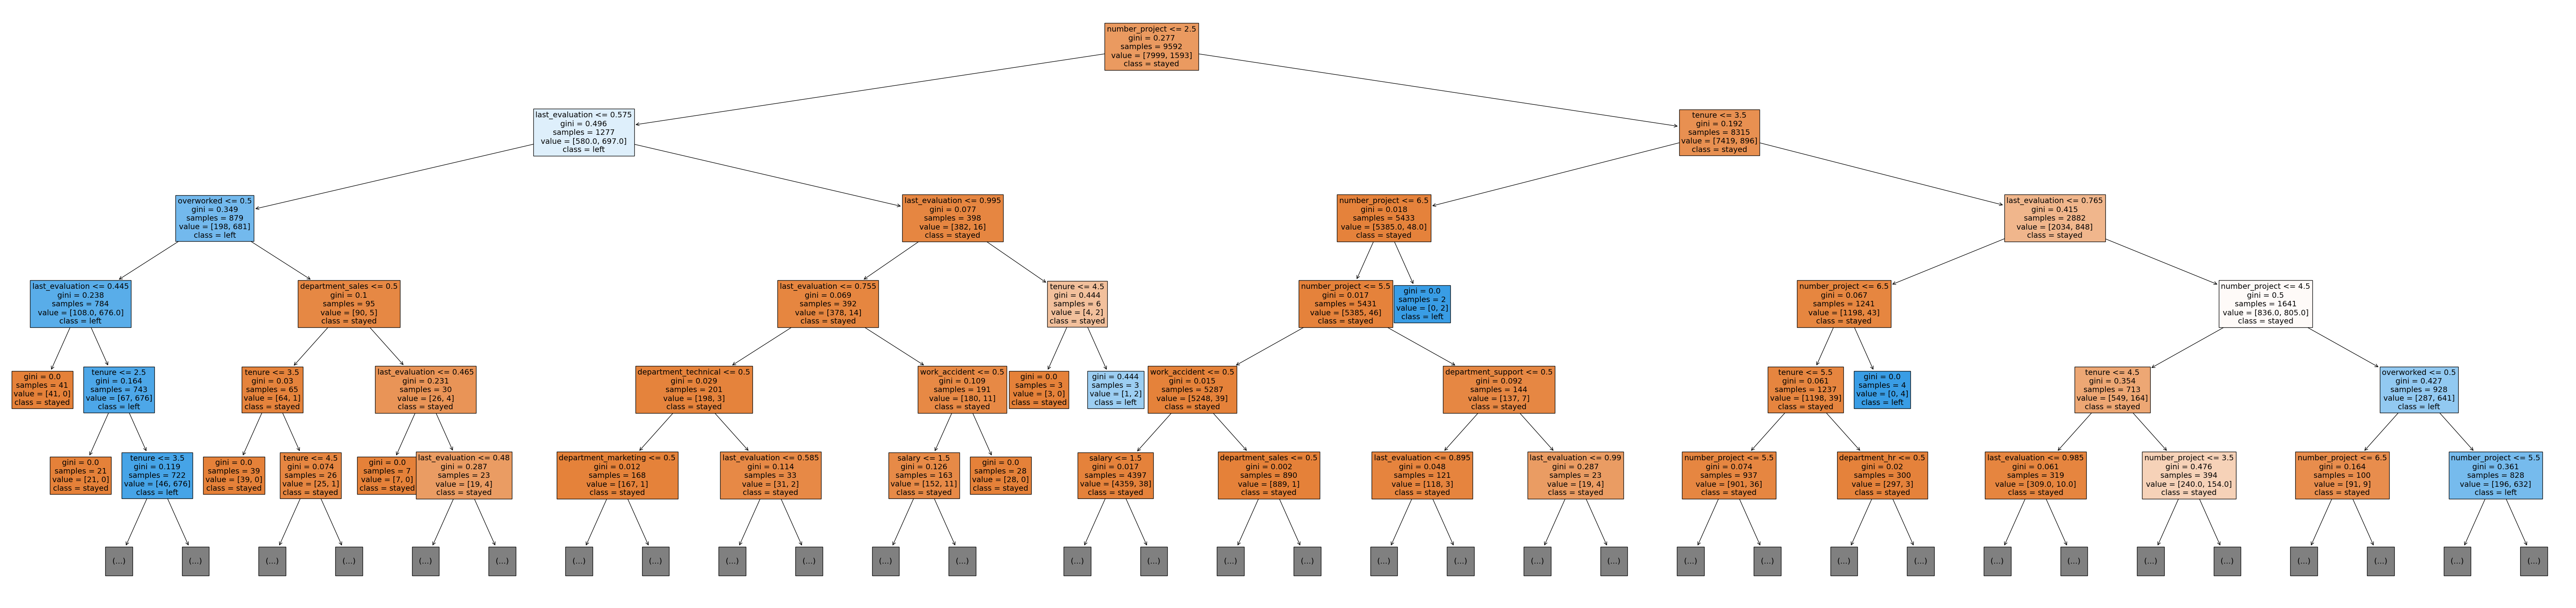

In [181]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree_new_cv.best_estimator_, max_depth=5, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

#### Decision tree feature importance

You can also get feature importance from decision trees (see the [DecisionTreeClassifier scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_) for details).

In [183]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree_new_cv_importances = pd.DataFrame(tree_new_cv.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree_new_cv_importances = tree_new_cv_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree_new_cv_importances = tree_new_cv_importances[tree_new_cv_importances['gini_importance'] != 0]
tree_new_cv_importances

gini_importance
last_evaluation                0.322725
number_project                 0.316408
tenure                         0.247929
overworked                     0.105949
department_support             0.001802
department_accounting          0.001728
department_RandD               0.001193
salary                         0.000780
department_technical           0.000485
department_sales               0.000470
department_hr                  0.000203
work_accident                  0.000142
department_product_mng         0.000124
department_marketing           0.000062

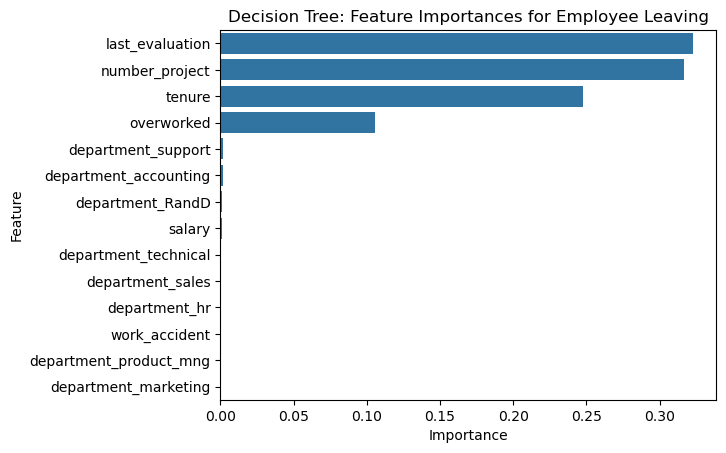

In [184]:
sns.barplot(data=tree_new_cv_importances, x="gini_importance", y=tree_new_cv_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()


The barplot above shows that in this decision tree model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`.

#### Random forest feature importance

Now, plot the feature importances for the random forest model.

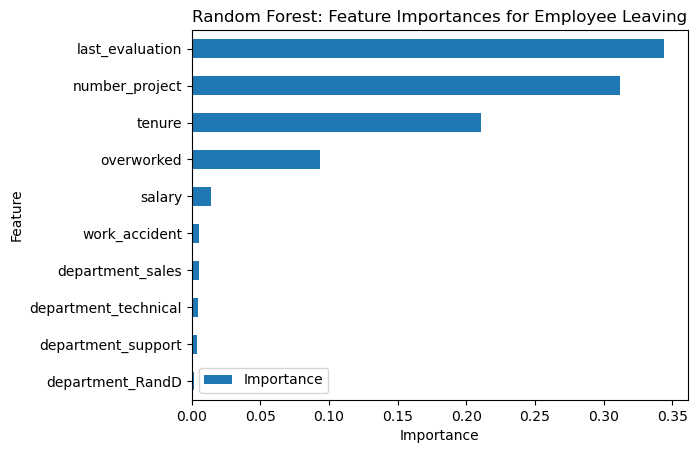

In [185]:
# Get feature importances
feat_impt = rf_new.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf_new.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above shows that in this random forest model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones used by the decision tree model.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



‚úè
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






üí≠
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results


**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set. The random forest modestly outperformed the decision tree model. 

### Conclusion and Recommendations

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in morealuable insight. 